In [1]:
import numpy as np
import pandas as pd

# read data

In [2]:
df1 = pd.read_csv("metadata.csv")

In [3]:
df2 = pd.read_csv("user-interactions.csv")

In [4]:
df1.rename(columns={"pratilipi_id": "story_id"},inplace=True)

In [ ]:
df2.rename(columns={"pratilipi_id": "story_id"},inplace=True)

# merge datasets

In [6]:
df = df1.merge(df2,on="story_id")

In [7]:
df.head()

,author_id,story_id,category_name,reading_time,updated_at_x,published_at,Unnamed: 0,user_id,read_percent,updated_at_y
0,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48,7108718,5506791995012091,100.0,2022-03-20 02:17:04.588
1,-2270332351871840,1377786215601277,relegion-and-spiritual,171,2021-01-21 16:27:07,2018-06-11 13:17:48,7108718,5506791995012091,100.0,2022-03-20 02:17:04.588
2,-2270332351871840,1377786215601277,shortstories,171,2021-01-21 16:27:07,2018-06-11 13:17:48,7108718,5506791995012091,100.0,2022-03-20 02:17:04.588
3,-2270332347597550,1377786216454709,translation,130,2020-08-19 16:19:40,2019-04-11 14:03:19,643288,5506791995065421,50.0,2022-03-22 16:52:55.524
4,-2270332347597550,1377786216454709,shortstories,130,2020-08-19 16:19:40,2019-04-11 14:03:19,643288,5506791995065421,50.0,2022-03-22 16:52:55.524


# EDA and try to understnad data

In [8]:
df = df.drop(columns=["published_at","Unnamed: 0","reading_time","author_id","updated_at_y"],axis=1)

In [9]:
df.head()

,story_id,category_name,updated_at_x,user_id,read_percent
0,1377786215601277,translation,2021-01-21 16:27:07,5506791995012091,100.0
1,1377786215601277,relegion-and-spiritual,2021-01-21 16:27:07,5506791995012091,100.0
2,1377786215601277,shortstories,2021-01-21 16:27:07,5506791995012091,100.0
3,1377786216454709,translation,2020-08-19 16:19:40,5506791995065421,50.0
4,1377786216454709,shortstories,2020-08-19 16:19:40,5506791995065421,50.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15892133 entries, 0 to 15892132
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   story_id       int64  
 1   category_name  object 
 2   updated_at_x   object 
 3   user_id        int64  
 4   read_percent   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 727.5+ MB


In [11]:
df['updated_at_x'] = pd.to_datetime(df['updated_at_x'])

In [12]:
df['date_year'] = df['updated_at_x'].dt.year

In [13]:
df = df.drop(columns=("updated_at_x"),axis=1)

In [14]:
df

,story_id,category_name,user_id,read_percent,date_year
0,1377786215601277,translation,5506791995012091,100.0,2021
1,1377786215601277,relegion-and-spiritual,5506791995012091,100.0,2021
2,1377786215601277,shortstories,5506791995012091,100.0,2021
3,1377786216454709,translation,5506791995065421,50.0,2020
4,1377786216454709,shortstories,5506791995065421,50.0,2020
...,...,...,...,...,...
15892128,1377786227982527,Horror-Marathon,5506791965450682,100.0,2022
15892129,1377786227983191,Horror-Marathon,5506791954885100,100.0,2022
15892130,1377786227983191,Horror-Marathon,5506791965450682,100.0,2022
15892131,1377786228132048,Horror-Marathon,5506791954885100,100.0,2022


In [179]:
import seaborn as sns

<AxesSubplot:>

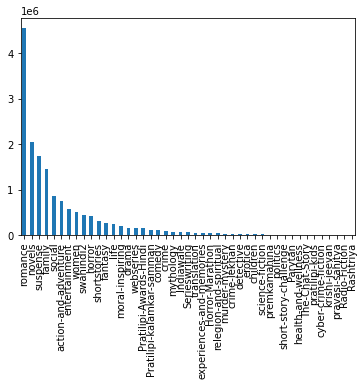

In [180]:
df['category_name'].value_counts().plot(kind='bar')

In [181]:
df['category_name'].value_counts()

romance                      4548851
novels                       2041519
suspense                     1747397
family                       1460656
social                        854282
action-and-adventure          755166
entertainment                 574792
women                         501823
swahindi2                     442299
horror                        434345
shortstories                  319740
fantasy                       271455
life                          246281
moral-inspiring               209302
drama                         167940
webseries                     166207
Pratilipi-Awards-Hindi        152542
Pratilipi-kalamkar-samman     121662
comedy                        120628
crime                         100986
mythology                      75782
Indiawale                      75478
Serieswriting                  64809
translation                    56702
experiences-and-memories       52652
Horror-Marathon                50647
relegion-and-spiritual         44615
m

In [183]:
df1["author_id"].value_counts().head()

-2270332332942443    8724
-2270332338444676    4473
-2270332343776990    3804
-2270332335251768    3742
-2270332324148635    3701
Name: author_id, dtype: int64

In [185]:
df.groupby("category_name")["story_id"].count().sort_values(ascending = False).head(10)

category_name
romance                 4548851
novels                  2041519
suspense                1747397
family                  1460656
social                   854282
action-and-adventure     755166
entertainment            574792
women                    501823
swahindi2                442299
horror                   434345
Name: story_id, dtype: int64

In [15]:
df.isnull().sum()

story_id         0
category_name    0
user_id          0
read_percent     0
date_year        0
dtype: int64

In [16]:
df.duplicated().sum()

0

#  create rating feature

In [17]:
 rating = []
    
for row in df['read_percent']:
    
    
    if row > 0.0 and row < 10.0 :    rating.append('1.0')
    elif row >= 10.0 and row < 15.0:  rating.append('1.3')
    elif row >= 15.0 and row < 30.0:  rating.append("1.5")
    elif row >= 30.0 and row < 35.0:  rating.append('2.0')
    elif row >= 35.0 and row < 40.0:  rating.append('2.3')
    elif row >= 40.0 and row < 45.0:  rating.append('2.5')
    elif row >= 45.0 and row < 50.0:  rating.append('2.7')  
    elif row >= 50.0 and row < 55.0:  rating.append('3.0')
    elif row >= 55.0 and row < 60.0:  rating.append('3.5')    
    elif row >= 60.0 and row < 65.0:  rating.append('3.7')    
    elif row >= 65.0 and row < 70.0:  rating.append('4.0')  
    elif row >= 70.0 and row < 75.0:  rating.append('4.1')
    elif row >= 75.0 and row < 80.0:  rating.append('4.3')
    elif row >= 80.0 and row < 85.0:  rating.append('4.5')
    elif row >= 85.0 and row < 90.0:  rating.append('4.7')    
    elif row >= 90.0 and row < 95.0:  rating.append('4.8')    
        
        
    else:           rating.append('5.0')
    
    
       

In [21]:
df['rating'] = rating

In [23]:
df['rating'] = df.rating.astype(float)

In [84]:
df

,story_id,category_name,user_id,read_percent,date_year,rating
0,1377786215601277,translation,5506791995012091,100.0,2021,5.0
1,1377786215601277,relegion-and-spiritual,5506791995012091,100.0,2021,5.0
2,1377786215601277,shortstories,5506791995012091,100.0,2021,5.0
3,1377786216454709,translation,5506791995065421,50.0,2020,3.0
4,1377786216454709,shortstories,5506791995065421,50.0,2020,3.0
...,...,...,...,...,...,...
15892128,1377786227982527,Horror-Marathon,5506791965450682,100.0,2022,5.0
15892129,1377786227983191,Horror-Marathon,5506791954885100,100.0,2022,5.0
15892130,1377786227983191,Horror-Marathon,5506791965450682,100.0,2022,5.0
15892131,1377786228132048,Horror-Marathon,5506791954885100,100.0,2022,5.0


# Popularity Based Filtering

In [42]:

num_rating_df = df.groupby('story_id').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,story_id,num_ratings
0,-873380518390072,446
1,-871376261835064,1
2,-871365888796984,2
3,-869506677565752,1
4,-869498782312760,38
...,...,...
192846,1377786228368822,3
192847,1377786228368833,9
192848,1377786228368866,3
192849,1377786228369099,4


In [43]:
avg_rating_df = df.groupby('story_id').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating_df.sample(10)

,story_id,avg_rating
102909,1377786223567174,5.000000
107019,1377786223820259,5.000000
95239,1377786223081061,4.793103
144921,1377786225988934,4.428571
190682,1377786228316645,5.000000
76080,1377786221648834,5.000000
125753,1377786224987316,4.300000
173894,1377786227712215,4.858997
192094,1377786228348291,5.000000
21334,1377786217183861,3.000000


In [52]:
popular_df = num_rating_df.merge(avg_rating_df,on='story_id')
popular_df

,story_id,num_ratings,avg_rating
0,-873380518390072,446,4.850224
1,-871376261835064,1,5.000000
2,-871365888796984,2,4.800000
3,-869506677565752,1,5.000000
4,-869498782312760,38,4.815789
...,...,...,...
192846,1377786228368822,3,5.000000
192847,1377786228368833,9,5.000000
192848,1377786228368866,3,5.000000
192849,1377786228369099,4,5.000000


In [53]:
popular_df = popular_df[popular_df['num_ratings']>=100].sort_values('avg_rating',ascending=False)

In [54]:
popular_df

,story_id,num_ratings,avg_rating
160242,1377786226866934,104,5.000000
161210,1377786226909959,171,5.000000
137674,1377786225643917,260,5.000000
137668,1377786225643648,264,5.000000
52335,1377786219908230,219,5.000000
...,...,...,...
135059,1377786225507397,135,2.211111
158000,1377786226742332,129,2.174419
172738,1377786227635081,102,2.132353
32320,1377786217982914,140,2.047143


In [55]:
popular_df = popular_df.merge(df1,on='story_id').drop_duplicates('story_id')[['story_id','category_name','author_id']]

In [56]:
popular_df.head()

,story_id,category_name,author_id
0,1377786226866934,action-and-adventure,-2270332339497520
2,1377786226909959,family,-2270332329881084
5,1377786225643917,Pratilipi-Awards-Hindi,-2270332332942443
7,1377786225643648,Pratilipi-Awards-Hindi,-2270332332942443
9,1377786219908230,romance,-2270332350288970
...,...,...,...
96726,1377786225507397,family,-2270332337864687
96729,1377786226742332,romance,-2270332337053696
96732,1377786227635081,romance,-2270332348215764
96735,1377786217982914,novels,-2270332345795281


# User-Based Collaborative Filtering

In [107]:
 x = df.groupby('user_id').count()['read_percent'] > 700
padhe_likhe_users = x[x].index

In [108]:
padhe_likhe_users

Int64Index([3514595527271076, 3628510196179620, 3709677454926500,
            3720050350400164, 3777900527395492, 3877822027702948,
            3908802014257828, 4050739908223652, 4161103482233508,
            4486566719693476,
            ...
            5506791995996937, 5506791996055816, 5506791996072012,
            5506791996118691, 5506791996194192, 5506791996267979,
            5506791996355608, 5506791996499162, 5506791996532386,
            5506791996556138],
           dtype='int64', name='user_id', length=1023)

In [109]:
filtered_percent = df[df['user_id'].isin(padhe_likhe_users)]

In [125]:
y = filtered_percent.groupby('story_id').count()['read_percent']>=60
famous_books = y[y].index

In [126]:
famous_books

Int64Index([1377786216623778, 1377786216798898, 1377786217369685,
            1377786217544226, 1377786217740496, 1377786217749371,
            1377786217982541, 1377786218116522, 1377786218488310,
            1377786218684587,
            ...
            1377786228354874, 1377786228355308, 1377786228356125,
            1377786228356318, 1377786228357164, 1377786228358135,
            1377786228358347, 1377786228358844, 1377786228363664,
            1377786228364236],
           dtype='int64', name='story_id', length=2457)

In [127]:
final_reco = filtered_percent[filtered_percent['story_id'].isin(famous_books)]

In [128]:
pt = final_reco.pivot_table(index='story_id',columns='user_id',values='read_percent')
pt.fillna(0,inplace=True)

In [129]:
pt.fillna(0,inplace=True)

In [139]:
pt.sample(10)

user_id,3514595527271076,3628510196179620,3709677454926500,3720050350400164,3777900527395492,3877822027702948,3908802014257828,4050739908223652,4161103482233508,4486566719693476,...,5506791995807846,5506791995921265,5506791995988547,5506791995996937,5506791996055816,5506791996072012,5506791996118691,5506791996194192,5506791996355608,5506791996532386
story_id,,,,,,,,,,,,,,,,,,,,,
1377786226153316,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786224821548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786228127045,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786226098672,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786224249902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786227223713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786226264308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786227366720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377786228343447,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 1377786216623778 to 1377786228364236
Columns: 988 entries, 3514595527271076 to 5506791996532386
dtypes: float64(988)
memory usage: 18.5 MB


In [133]:
from sklearn.metrics.pairwise import cosine_similarity

In [134]:
similarity_scores = cosine_similarity(pt)

In [135]:
similarity_scores.shape

(2457, 2457)

In [147]:
def recommend(user_id):
    # index fetch
    index = np.where(pt.index==user_id)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['story_id'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('story_id')['story_id'].values))
        item.extend(list(temp_df.drop_duplicates('story_id')['category_name'].values))
        #item.extend(list(temp_df.drop_duplicates('story_id')['user_id'].values))
        
        
        
        data.append(item)
    
    return data

# prediction

In [151]:
recommend(3628510196179620)

[[1377786228343388, 'family'],
 [1377786228343958, 'family'],
 [1377786228343352, 'family'],
 [1377786228343317, 'family'],
 [1377786228344428, 'family']]

# Final Conclusion

# 1) It’s easy to come up with a function for non-personalized collaborative filtering that returns a score taking user parameters.
# 2) There are two apporch is used to develop model 


#         1) Popularity based recommendation 
#         2) Collaborative based recommendation system